# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

We'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [11]:
# domgross is the outcome variable
from sklearn.model_selection import train_test_split
X = pd_df.drop(['domgross'], axis = 1)
y = pd.DataFrame(pd_df['domgross'])

In [94]:
#Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y)


## Fit a regression model to the training data and look at the coefficients

In [95]:
#Your code
from sklearn.linear_model import LinearRegression
df_train = pd.concat([X_train, y_train], axis = 1, ignore_index = True)
data_train = df_train.sort_values([0])
reg = LinearRegression().fit(X_train, y_train)
R2 = reg.score(X_train, y_train)

In [96]:
print(R2)

0.4218946119440752


## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- a line showing the diagonal of y_train. The actual y_train values are on this line
- next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

ValueError: shapes (22,1) and (4,1) not aligned: 1 (dim 1) != 4 (dim 0)

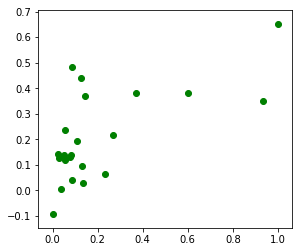

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code here
plt.figure(figsize=(10, 4))
plt.scatter(y_train, reg.predict(X_train), color = "green")
plt.plot(data_train[0].values.reshape(-1, 1), reg.predict(data_train[0].values.reshape(-1, 1)))
y_train_hat = reg.predict(data_train[0].values.reshape(-1, 1))

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

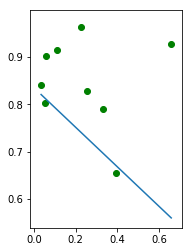

In [32]:
# your code here
df_test = pd.concat([X_test, y_test], axis=1, ignore_index=True)
data_test = df_test.sort_values([0])

plt.subplot(1, 2, 2)
plt.scatter(data_test[0], data_test[1], color = "green")
plt.plot(data_test[0].values.reshape(-1, 1), reg.predict(data_test[0].values.reshape(-1, 1)))
y_test_hat = reg.predict(data_test[0].values.reshape(-1, 1))

## Calculate the bias
Write a formula to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [33]:
import numpy as np
def bias(y, y_hat):
    bias = np.mean(y_hat) - np.mean(y)
    return bias

## Calculate the variance
Write a formula to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [34]:
def variance(y_hat):
    variance = np.mean(y_hat**2) - np.mean(y_hat)**2
    return variance
        

## Use your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [35]:
# code for train set bias and variance
print(bias(y_train, y_train_hat))
print(variance(y_train_hat))

domgross    0.517399
dtype: float64
0.011350563741044928


In [36]:
# code for test set bias and variance
print(bias(y_test, y_test_hat))
print(variance(y_test_hat))

domgross    0.486993
dtype: float64
0.006442955980876408


## Describe in words what these numbers can tell you.

There is more bias and variance in the training data. It seems like we have an underfitted model.

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [65]:
np.max(X_fin)

1.0

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)  
X_fin = poly.fit_transform(data_train[0].values.reshape(-1, 1))
reg_poly = LinearRegression().fit(X_fin, data_train[1])

## Plot your overfitted model's training predictions against the actual data

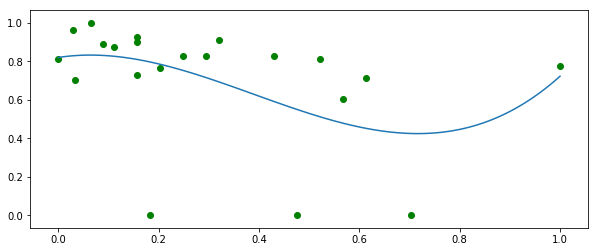

In [67]:
# your code here
X_linspace = pd.DataFrame(np.linspace(0,1,100), columns = ["Temp"])
X_linspace_fin = poly.fit_transform(X_linspace)

y_poly_pred = reg_poly.predict(X_linspace_fin)

plt.figure(figsize=(10, 4))
plt.scatter(data_train[0], data_train[1], color = "green")
plt.plot(X_linspace,y_poly_pred)

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [75]:
# your code here
print(bias(data_train[1], y_poly_pred))
print(variance(y_poly_pred))

-0.09661171591074946
0.021122649631935997


## Plot your overfitted model's test predictions against the actual data.

In [84]:
print(len(X_linspce))

9


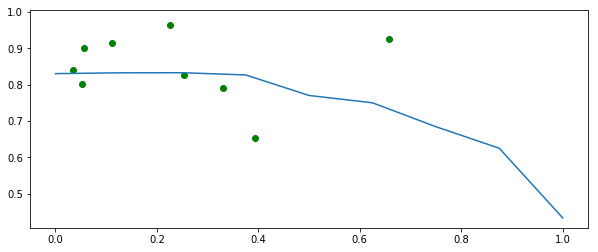

In [85]:
# your code here
X_linspce = pd.DataFrame(np.linspace(0,1,9))
X_fin_test = poly.fit_transform(data_test[0].values.reshape(-1, 1))
y_pred = reg_poly.predict(X_fin_test)

plt.figure(figsize=(10, 4))
plt.scatter(data_test[0], data_test[1], color = "green")
plt.plot(X_linspce,y_pred)

##  Calculate the bias and variance for the train set.

In [86]:
# your code here
print(bias(data_test[1], y_pred))
print(variance(y_pred))

-0.11473959175808146
0.015908844991477378


## Describe what you notice about the bias and variance statistics for your overfit model

The bias and variance for the test set both increased drastically in the overfit model.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight in how bias and variance change for a training and test set by using a pretty "simple" model, and a very complex model. 